Extracting Dataset using Kaggle API

In [1]:
# installing the Kaggle API
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing the Dog vs Cat Dataset from Kaggle

In [4]:
#kaggle api
!kaggle competitions download -c dogs-vs-cats

 99% 802M/812M [00:10<00:00, 92.1MB/s]
100% 812M/812M [00:10<00:00, 79.0MB/s]


In [5]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [6]:
#extracting the compressed file
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The Dataset is Extracted')

The Dataset is Extracted


In [10]:
#extracting the compressed file
from zipfile import ZipFile

dataset = '/content/train.zip'
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The Dataset is Extracted')

The Dataset is Extracted


In [11]:
import os

#counting the no. of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of Images:',file_count)

Number of Images: 25000


Printing the name of images

In [12]:
file_names = os.listdir('/content/train/')
print(file_names)

['dog.4785.jpg', 'cat.8027.jpg', 'dog.8689.jpg', 'dog.851.jpg', 'cat.7093.jpg', 'dog.6868.jpg', 'dog.684.jpg', 'cat.10085.jpg', 'cat.5868.jpg', 'cat.1806.jpg', 'cat.8311.jpg', 'dog.2641.jpg', 'dog.11209.jpg', 'cat.6768.jpg', 'dog.2692.jpg', 'dog.3279.jpg', 'cat.10517.jpg', 'dog.12047.jpg', 'cat.7291.jpg', 'cat.7227.jpg', 'dog.4363.jpg', 'dog.2080.jpg', 'dog.5200.jpg', 'cat.3162.jpg', 'dog.9815.jpg', 'cat.5982.jpg', 'cat.11658.jpg', 'dog.7716.jpg', 'dog.3302.jpg', 'dog.12170.jpg', 'cat.4642.jpg', 'dog.5123.jpg', 'dog.12412.jpg', 'cat.8329.jpg', 'dog.2921.jpg', 'dog.5966.jpg', 'cat.4365.jpg', 'cat.3064.jpg', 'dog.8262.jpg', 'dog.7677.jpg', 'dog.737.jpg', 'dog.12393.jpg', 'cat.10462.jpg', 'dog.3906.jpg', 'cat.1350.jpg', 'cat.5657.jpg', 'cat.5314.jpg', 'dog.6802.jpg', 'cat.1197.jpg', 'dog.11217.jpg', 'dog.3798.jpg', 'dog.11228.jpg', 'cat.8903.jpg', 'dog.4833.jpg', 'cat.2262.jpg', 'dog.6786.jpg', 'cat.3287.jpg', 'cat.9268.jpg', 'cat.12106.jpg', 'dog.3189.jpg', 'dog.7236.jpg', 'dog.2490.jpg'

Importing the dependencies

In [13]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from  sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Displaying the Images of Dogs and Cats

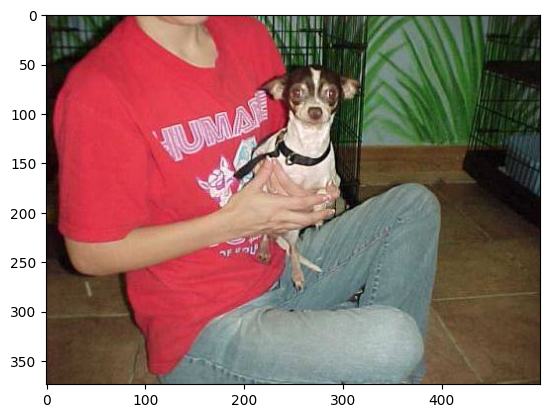

In [14]:
#display dog image
img = mpimg.imread('/content/train/dog.4785.jpg')
plt.imshow(img)

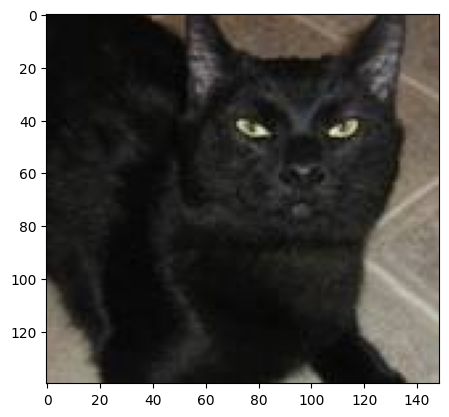

In [15]:
#display cat image
img = mpimg.imread('/content/train/cat.8027.jpg')
plt.imshow(img)

In [16]:
file_names = os.listdir('/content/train/')

dog_count=0;
cat_count=0;
for img_file in file_names:
  name = img_file[0:3]

  if name=='dog':
    dog_count +=1

  else:
    cat_count +=1

print('Number of dog Images=',dog_count)
print('Number of cat Images=',cat_count)

Number of dog Images= 12500
Number of cat Images= 12500


**Resizing all the Images**

In [17]:
# creating a directory for resized Image
os.mkdir('/content/image resized')

In [18]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):
  filename = os.listdir(original_folder)[i]
  img_path = original_folder + filename

  img = Image.open(img_path)
  img = img.resize((224,224))
  img = img.convert('RGB')

  newImgPath = resized_folder + filename
  img.save(newImgPath)

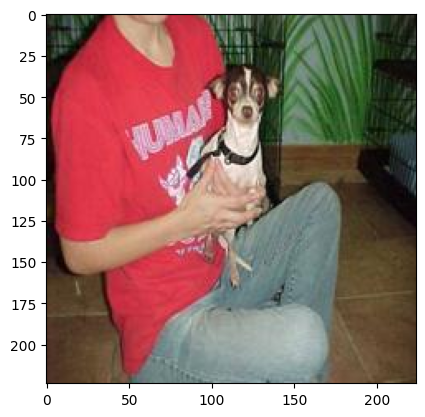

In [19]:
#display resized dog image
img = mpimg.imread('/content/image resized/dog.4785.jpg')
plt.imshow(img)

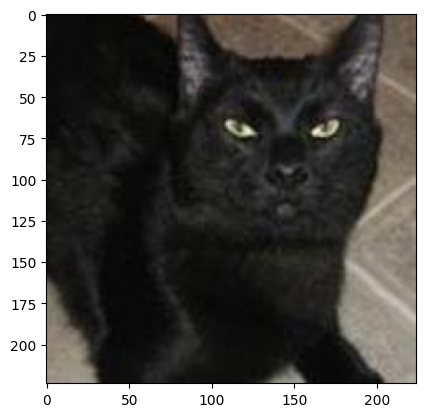

In [20]:
#display resized cat image
img = mpimg.imread('/content/image resized/cat.8027.jpg')
plt.imshow(img)

**Creating labels for resized images of dogs and cats**

Cat -> 0

Dog -> 1

In [32]:
# creating a for loop to assign lables
file_names = os.listdir('/content/image resized/')

labels = []

for i in range(2000):
  file_name = file_names[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [33]:
print(file_names[0:5])
print(len(file_names))

['dog.4785.jpg', 'cat.8027.jpg', 'dog.8689.jpg', 'dog.851.jpg', 'cat.7093.jpg']
2000


In [34]:
print(labels[0:5])
print(len(labels))

[1, 0, 1, 1, 0]
2000


In [38]:
# counting the images of dogs and cats out of 2000 Images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[ 983 1017]


Converting all the resized images into numpy array

In [39]:
import cv2
import glob

In [40]:
image_directory = '/content/image resized/'
image_extension = ['png','jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])
print(dog_cat_images)

[[[[ 25  34  37]
   [ 42  51  54]
   [ 35  47  47]
   ...
   [ 47  55  55]
   [ 47  55  55]
   [ 17  25  25]]

  [[ 28  38  38]
   [ 39  49  49]
   [ 29  42  40]
   ...
   [ 46  54  54]
   [ 45  53  53]
   [ 18  26  26]]

  [[ 35  46  44]
   [ 40  51  48]
   [ 30  44  38]
   ...
   [ 40  48  47]
   [ 38  46  46]
   [ 15  23  23]]

  ...

  [[ 37  46  73]
   [ 40  49  76]
   [ 41  52  79]
   ...
   [ 40  62  80]
   [ 40  62  80]
   [ 40  62  80]]

  [[ 35  44  71]
   [ 38  47  74]
   [ 40  51  78]
   ...
   [ 32  54  72]
   [ 31  53  71]
   [ 31  53  71]]

  [[ 33  42  69]
   [ 37  46  73]
   [ 39  50  77]
   ...
   [ 31  53  71]
   [ 34  56  74]
   [ 36  58  76]]]


 [[[ 10  10  10]
   [ 10  10  10]
   [ 10  10  10]
   ...
   [ 77  91 109]
   [ 80  94 113]
   [ 79  93 112]]

  [[ 10  10  10]
   [ 10  10  10]
   [ 10  10  10]
   ...
   [ 76  90 108]
   [ 80  94 113]
   [ 79  93 112]]

  [[ 10  10  10]
   [ 10  10  10]
   [ 10  10  10]
   ...
   [ 76  90 108]
   [ 80  94 113]
   [ 79  93

In [41]:
type(dog_cat_images)

numpy.ndarray

In [42]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [43]:
X = dog_cat_images
Y = np.asarray(labels)

**Train Test Split**

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=3)

In [45]:
print(X.shape,X_train.shape,X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600 -> Training Images

400 - > Test Images

In [46]:
# scaling the Data
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [47]:
print(X_train_scaled)

[[[[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]]

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   [0.99215686 0.99215686 0.99215686]]

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.99215686 0.99215686 0.99215686]
   [0.99215686 0.99215686 0.99215686]
   [0.99215686 0.99215686 0.99215686]]

  ...

  [[0.99215686 0.99215686 0.99215686]
   [0.99215686 0.99215686 0.99215686]
   [0.99215686 0.99215686 0.99215686]
   ...
   [1.         1.         0.99607843]
   [1.         1.         0.99607843]
   [0.99607843 1.         0.99215686]]

  [[1.         1.         1.        ]
   [1. 

### **Building the Neural Network**

In [48]:
import tensorflow as tf
import tensorflow_hub as hub

In [51]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [52]:
num_of_classes = 2

model = tf.keras.Sequential([

    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [53]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [54]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 83s 1s/step - loss: 0.2023 - acc: 0.9244
Epoch 2/5
50/50 [==============================] - 86s 2s/step - loss: 0.0633 - acc: 0.9800
Epoch 3/5
50/50 [==============================] - 68s 1s/step - loss: 0.0448 - acc: 0.9869
Epoch 4/5
50/50 [==============================] - 63s 1s/step - loss: 0.0356 - acc: 0.9906
Epoch 5/5
50/50 [==============================] - 66s 1s/step - loss: 0.0291 - acc: 0.9937


In [55]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 18s 1s/step - loss: 0.0459 - acc: 0.9825
Test Loss = 0.045900750905275345
Test Accuracy = 0.9825000166893005


**Predictive System**

Path of the image to be predicted: /content/dog.jpg


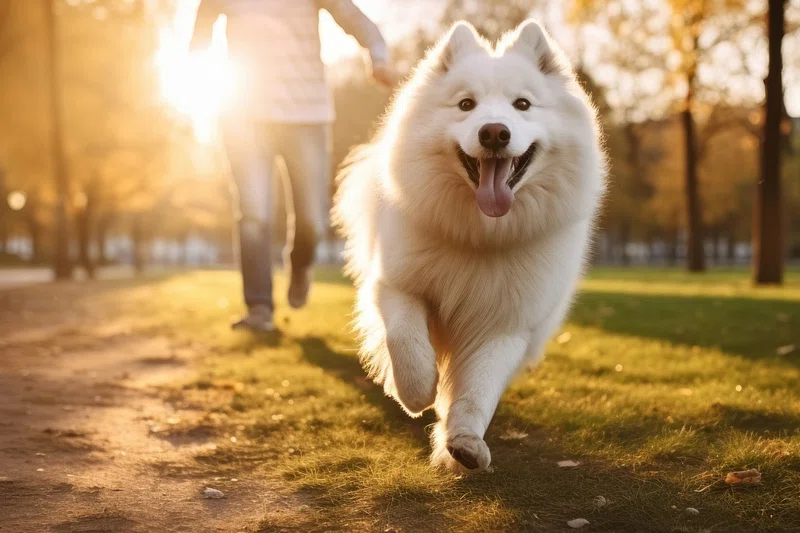

1/1 [==============================] - 0s 71ms/step
[[-0.42134684  1.6147506 ]]
1
The image represents a Dog


In [72]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: /content/cattt.jpg


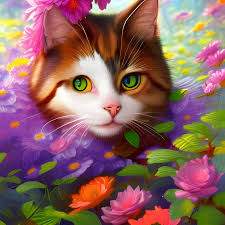

1/1 [==============================] - 0s 48ms/step
[[ 5.3499384 -5.62793  ]]
0
The image represents a Cat


In [78]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

This is How we classify Dogs & Cats using Neural Network

     Hasrat Ali
     Thank You:)